## Concatenation of MSD protocols

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import itertools

In [2]:
def f15(theta):
    x, y = np.sin(theta), np.cos(theta)
    u = (x**15+435*x**7 *y**8+105*x**11 *y**4+15*x**7-280*x**9* y**6+35*x**3 *y**12+105*x**3 *y**4-168*x**5 *y**10) /(1+15*x**8+15*y**8+210*x**4* y**4)  # Example function for u
    v = (y**15+435*y**7 *x**8+105*y**11 *x**4+15*y**7-280*y**9* x**6+35*y**3 *x**12+105*y**3 *x**4-168*y**5 *x**10) /(1+15*x**8+15*y**8+210*x**4* y**4)
    theta_output = np.arctan(u/v)
    return theta_output

def f3(theta):
    x, z = np.sin(theta), np.cos(theta)
    u = (x*z+z**2)/(1+x*z+x**2*z)
    v = (x+x*z+x**2*z)/(1+x*z+x**2*z)
    theta_output = np.arctan(u/v)
    return theta_output
def f6(theta):
    x, z = np.sin(theta), np.cos(theta)
    u = (z**4 - 2*x**2*z**4 + 2*x*z**3 + 2*x**3 + 2*x**4) /(1 + 2*x*z**3 + 4*x**2*z**3 + 2*x**3+x**4) 
    v = (2*x*z**2 + 2*x**2*z + x*z**3 + x*z + 2*x**2*z**2 - x**3*z**3 + x**5*z) /(1 + 2*x*z**3 + 4*x**2*z**3 + 2*x**3+x**4)
    theta_output = np.arctan(u/v)
    return theta_output

def f4(theta):
    # Example transformation function for x
    x, y = np.sin(theta), np.cos(theta)
    u = (y**2+2*x*y+x**2 * y**2)/(1+2*x*y+x**2 * y**2 + x**2)
    v = (x+2*x**2*y+x*y**2+x**3)/(1+2*x*y+x**2 * y**2 + x**2)
    theta_output = np.arctan(u/v)
    return theta_output


def concatenation_MSD(theta, round_list):
    for round in round_list:
        if round == 'A':
            theta = f6(theta) ## For different base code, adjust here by e.g. theta = f3(theta)
        elif round == 'B':
            theta = f15(theta) ## ## For different base code, adjust here by e.g. theta = f4(theta)
        
        else:
            raise ValueError('Doesnt support this type!')
    return theta

def find_fixed_point(protocol, iterations=10000, theta_input=np.pi/4, error_tolerance=1e-15):

    theta = theta_input
    for _ in range(iterations):
        new_theta = concatenation_MSD(theta, protocol)
        if np.abs(new_theta-theta)<error_tolerance:
            theta = new_theta
            break
        else:
            theta = new_theta
    return theta


In [3]:
## Function to generate all possible case for concatenation, represented by string composed 'A' and 'B'.
def generate_strings_itertools(length):

    characters = ['A', 'B']
    combinations = itertools.product(characters, repeat=length)
    strings = [''.join(combo) for combo in combinations]

    return strings

strings = generate_strings_itertools(3)
print(strings)


['AAA', 'AAB', 'ABA', 'ABB', 'BAA', 'BAB', 'BBA', 'BBB']


Text(0.5, 1.0, 'Distribution of fixed points for concatenated protocols with six-qubit code and [[15, 1, 3]] code, N_max = 12')

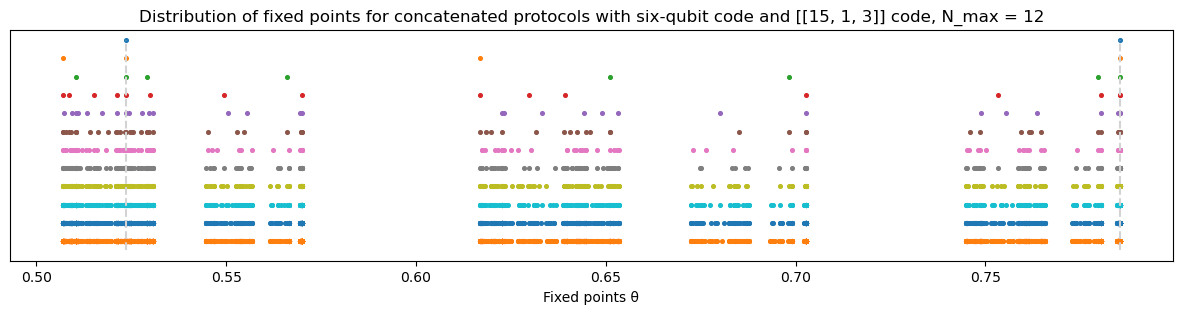

In [4]:
plt.figure(figsize=(15, 3))  # Adjust the figure size as needed
plt.yticks([])
plt.xlabel('Fixed points θ') 
#plt.vlines(np.arctan(np.sqrt(0.5*(np.sqrt(5)-1))),.75, .98,linestyles='--',color='lightgrey')
#plt.vlines(0.73146,.75, 0.98,linestyles='--',color='lightgrey')
plt.vlines(np.pi/4,.75, .98,linestyles='--',color='lightgrey')
plt.vlines(np.pi/6,.75, .98,linestyles='--',color='lightgrey')

for order in range(1,13):

    protocol_list = generate_strings_itertools(order)
    theta_list = []

    for round_string in protocol_list:
        theta = find_fixed_point(protocol=round_string,iterations=1000)
        # Plotting the trajectory
        #print(round_string)
        #print(x_values[-1], y_values[-1])
        theta_list.append(theta)

    plt.scatter(theta_list, np.ones(len(theta_list))-0.02*order, color='C'+str(order-1),marker='o', s=7, label='order-'+str(order))  # Plotting the dat

plt.title('Distribution of fixed points for concatenated protocols with six-qubit code and [[15, 1, 3]] code, N_max = 12')

## Fractal analysis

In [5]:
def get_boxes_occupied(epsilon, theta_list):
    theta_list = np.sort(theta_list)
    theta_min, theta_max = theta_list[0], theta_list[-1]
    theta_list = (theta_list - theta_min) / (theta_max - theta_min)
    N = 0
    for k in range(int(np.ceil(1/epsilon))):
        for theta in theta_list:
            if theta>=k*epsilon and theta<(k+1)*epsilon:
                N = N + 1
                break;

    return N

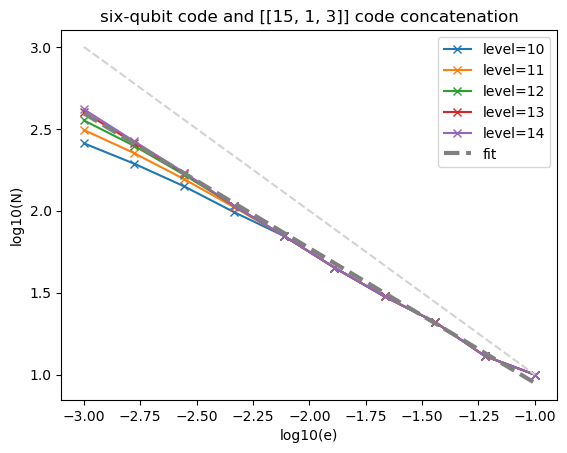

In [6]:
N_list = []
e_list = []
for order in range(10,15):
    protocol_list = generate_strings_itertools(order)
    theta_list = []

    for round_string in protocol_list:
        theta = find_fixed_point(protocol=round_string,iterations=1000)
        # Plotting the trajectory
        #print(round_string)
        #print(x_values[-1], y_values[-1])
        theta_list.append(theta)


    # epsilon = 2**(-order)
    # e_list.append(epsilon)
    # N_list.append(get_boxes_occupied(epsilon,theta_list))
    N_list = []
    e_list = np.logspace(-3,-1,10)
    for epsilon in e_list:
        N_list.append(get_boxes_occupied(epsilon, theta_list))

    N_list = np.array(N_list)
    plt.plot(np.log10(e_list), np.log10(N_list),'-x',label='level='+str(order))

polyfit_coef = np.polyfit(np.log10(e_list), np.log10(N_list),1)

#plt.plot(np.log10(e_list), np.log10(N_list),'-x')
#plt.plot(np.log10(e_list),-0.79846252*(np.log10(e_list)+1)+1,'--',color='grey',linewidth=3,label='fit')
plt.plot(np.log10(e_list),-np.log10(e_list),'--',color='lightgrey')
plt.plot(np.log10(e_list),polyfit_coef[0]*np.log10(e_list)+polyfit_coef[1],'--',color='grey',linewidth=3,label='fit')
#plt.plot(np.log10(e_list),-0.9519842*(np.log10(e_list)+1)+1,'--',color='grey',linewidth=3,label='fit')
#plt.plot(np.log10(e_list),-0.68396737*(np.log10(e_list)+1)+1,'--',color='grey',linewidth=3,label='fit')
#plt.text(-2,2,'FD='+str(0.7985))
plt.xlabel('log10(e)')
plt.ylabel('log10(N)')
plt.title('six-qubit code and [[15, 1, 3]] code concatenation')
plt.legend()